## Загрузка библиотек

In [48]:
import pandas as pd

## Загрузка данных

### Задание 1 (0.5 балла)

Для начала работы нам необходимо научиться читать набор данных. В данном домашнем задании мы поработаем с двумя наборами данных.

__covid.csv__ ([источник](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)) - статистика по вакцинированию от COVID19 по разным странам. Для данного датасета нет конкретной предсказательной переменной.

__hr.csv__ ([источник](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)) - набор данных большего размера. Он содержит статистику по людям, проходящим курсы по Big Data & ML. _Target_ - 1 или 0, сменил ли человек работу после прохождения курсов - или нет.

Реализуйте методы `read_covid_dataset` и `read_hr_dataset`. Каждый из них принимает на вход путь к набору данных и возвращает выборку `X` и соответствующие метки `y`. В случае _covid_ датасета `y` возвращается как `None`. 

In [49]:
def read_covid_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    return pd.read_csv(path_to_csv), None


def read_hr_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    df = pd.read_csv(path_to_csv)
    return df.drop(['target'], axis=1), df['target']

In [50]:
COVID_DATA_PATH = 'covid.csv'
HR_DATA_PATH = 'hr.csv'

In [51]:
X_covid, _ = read_covid_dataset(COVID_DATA_PATH)
X_hr, y_hr = read_hr_dataset(HR_DATA_PATH)

## EDA

### Задание 2 (3.5 балла)

Выполните задание для датасетa _hr_.

Для дальнейшей работы с данными нужно обработать пропущенные значения в датасете.
Существуют различные стратегии обработки пропущенных данных.

#### 1.  (0.5 балла)

Для числовых признаков постройте распределения признаков. Для категориальных признаков выведите статистику по количеству значений признака.

<AxesSubplot:title={'center':'city_development_index'}, ylabel='Frequency'>

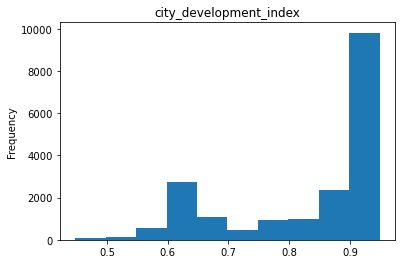

In [16]:
X_hr['city_development_index'].plot.hist(title='city_development_index')

<AxesSubplot:title={'center':'training_hours'}, ylabel='Frequency'>

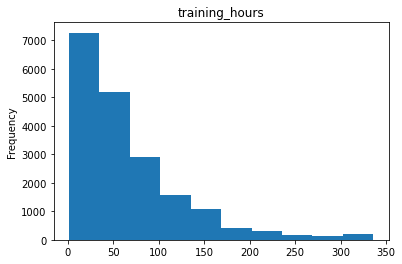

In [17]:
X_hr['training_hours'].plot.hist(title='training_hours')

<AxesSubplot:title={'center':'gender'}>

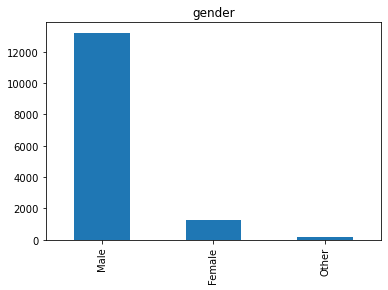

In [21]:
X_hr['gender'].value_counts().plot(kind='bar', title='gender')

<AxesSubplot:title={'center':'relevent_experience'}>

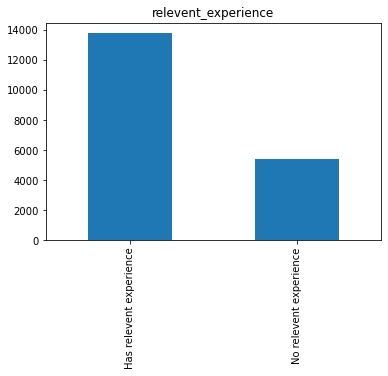

In [24]:
X_hr['relevent_experience'].value_counts().plot(kind='bar', title='relevent_experience')

<AxesSubplot:title={'center':'enrolled_university'}>

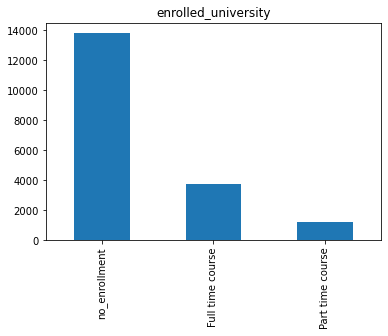

In [25]:
X_hr['enrolled_university'].value_counts().plot(kind='bar', title='enrolled_university')

<AxesSubplot:title={'center':'education_level'}>

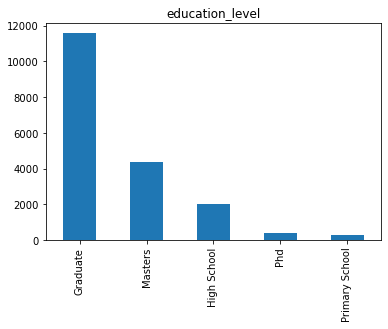

In [26]:
X_hr['education_level'].value_counts().plot(kind='bar', title='education_level')

<AxesSubplot:title={'center':'major_discipline'}>

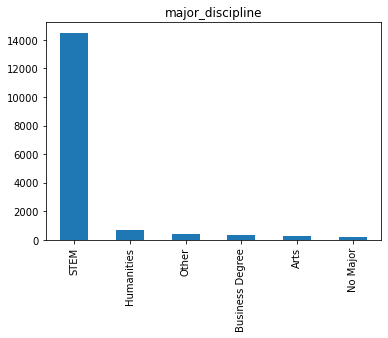

In [27]:
X_hr['major_discipline'].value_counts().plot(kind='bar', title='major_discipline')

<AxesSubplot:title={'center':'experience'}>

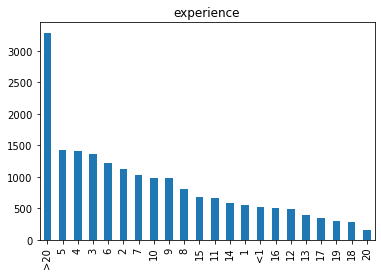

In [28]:
X_hr['experience'].value_counts().plot(kind='bar', title='experience')

<AxesSubplot:title={'center':'company_size'}>

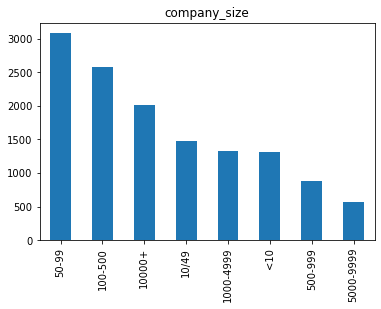

In [29]:
X_hr['company_size'].value_counts().plot(kind='bar', title='company_size')

<AxesSubplot:title={'center':'company_type'}>

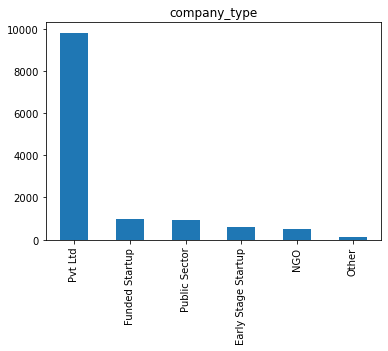

In [30]:
X_hr['company_type'].value_counts().plot(kind='bar', title='company_type')

<AxesSubplot:title={'center':'last_new_job'}>

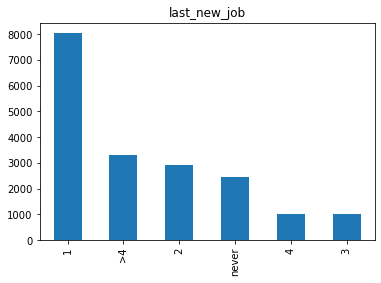

In [31]:
X_hr['last_new_job'].value_counts().plot(kind='bar', title='last_new_job')

#### 2.  (0.5 балла)
Удалите все строки, где есть хотя бы одно пропущенное значение признака. Насколько сильно уменьшился размер датасета? Как изменились распределения признаков/статистика по количеству значений признаков?

In [33]:
print(f'Исходный размер датасета hr {X_hr.shape[0]}')

Исходный размер датасета hr 19158


In [34]:
X_hr_dropna = X_hr[X_hr.apply(lambda x: not x.isnull().values.any(), axis=1)]

In [35]:
print(f'Pазмер датасета covid без NaN {X_hr_dropna.shape[0]}')

Pазмер датасета covid без NaN 8955


<AxesSubplot:title={'center':'city_development_index'}, ylabel='Frequency'>

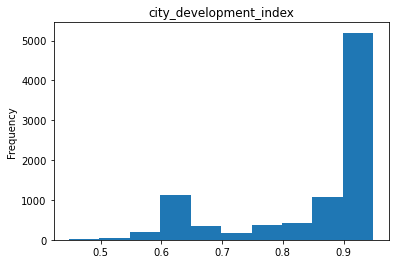

In [36]:
X_hr_dropna['city_development_index'].plot.hist(title='city_development_index')

<AxesSubplot:title={'center':'training_hours'}, ylabel='Frequency'>

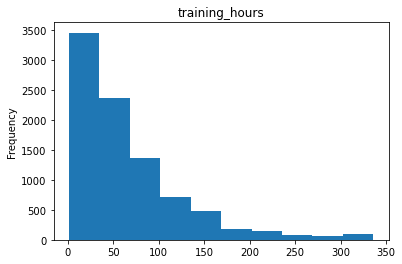

In [37]:
X_hr_dropna['training_hours'].plot.hist(title='training_hours')

<AxesSubplot:title={'center':'gender'}>

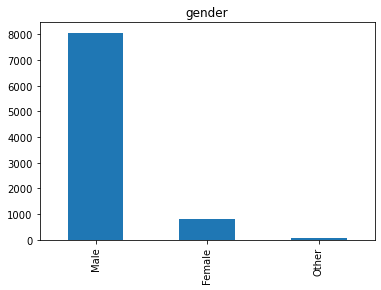

In [38]:
X_hr_dropna['gender'].value_counts().plot(kind='bar', title='gender')

<AxesSubplot:title={'center':'relevent_experience'}>

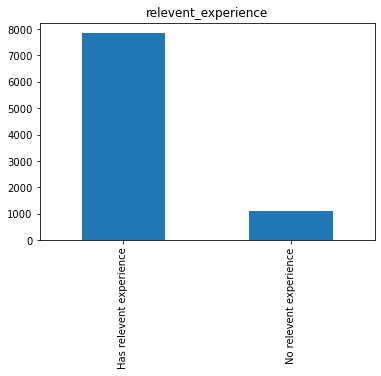

In [39]:
X_hr_dropna['relevent_experience'].value_counts().plot(kind='bar', title='relevent_experience')

<AxesSubplot:title={'center':'enrolled_university'}>

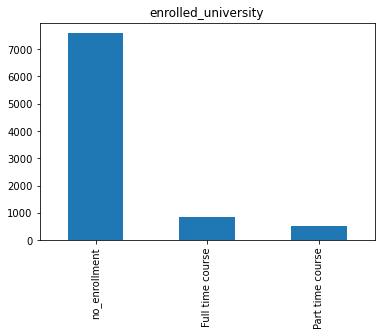

In [40]:
X_hr_dropna['enrolled_university'].value_counts().plot(kind='bar', title='enrolled_university')

<AxesSubplot:title={'center':'education_level'}>

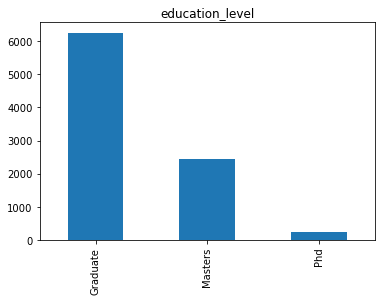

In [41]:
X_hr_dropna['education_level'].value_counts().plot(kind='bar', title='education_level')

<AxesSubplot:title={'center':'major_discipline'}>

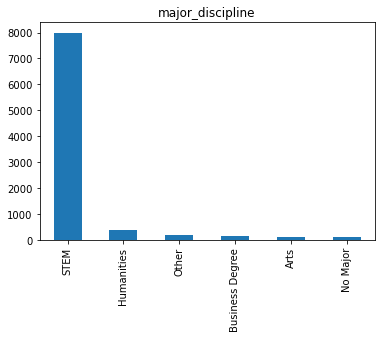

In [42]:
X_hr_dropna['major_discipline'].value_counts().plot(kind='bar', title='major_discipline')

<AxesSubplot:title={'center':'experience'}>

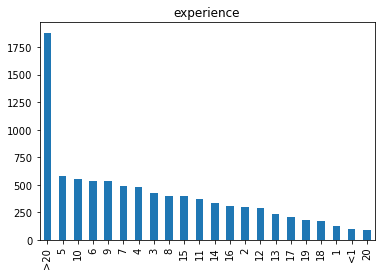

In [43]:
X_hr_dropna['experience'].value_counts().plot(kind='bar', title='experience')

<AxesSubplot:title={'center':'company_size'}>

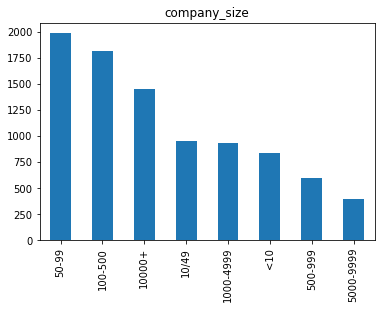

In [45]:
X_hr_dropna['company_size'].value_counts().plot(kind='bar', title='company_size')

<AxesSubplot:title={'center':'company_type'}>

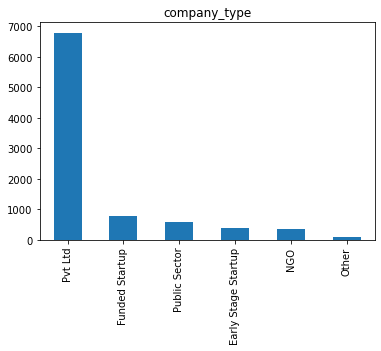

In [46]:
X_hr_dropna['company_type'].value_counts().plot(kind='bar', title='company_type')

<AxesSubplot:title={'center':'last_new_job'}>

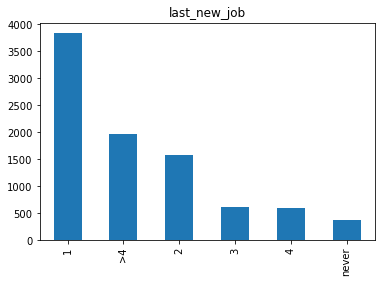

In [47]:
X_hr_dropna['last_new_job'].value_counts().plot(kind='bar', title='last_new_job')

relevent_experience: значительно уменьшилось число no relevant experience / has relevant experience

enrolled_university: значительно увеличился процент no enrollment

education_level: потерялись категории High School и Primary School

last_new_job: уменьшился процент людей с last_new_job=1

по остальным признакам изменения в распределении менее заметны

Давайте попробуем избежать сокращения размера датасета.

#### 3.  (1 балл)
Для числовых признаков заполните пропущенные данные средним/медианой/модой данного признака. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

#### 4.  (1 балл)
Для категориальных признаков заполните пропущенные значения самой встречающейся категорией или создайте отдельную категорию пропущенных значений. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

_Ваш ответ_

In [52]:
# количество пропущенных значений
for col in X_hr.columns:
    print(col, X_hr[X_hr[col].isnull()].shape[0])


enrollee_id 0
city 0
city_development_index 0
gender 4508
relevent_experience 0
enrolled_university 386
education_level 460
major_discipline 2813
experience 65
company_size 5938
company_type 6140
last_new_job 423
training_hours 0


можно удалить строки с NaN значениями enrolled_university, education_level, experience, last_new_job, так как выборка при этом уменьшится < 15%

In [81]:
print('gender Male / not NaN:', X_hr.query('gender == "Male"').shape[0]/X_hr.query('gender.notna()', engine='python').shape[0])
print('major_discipline STEM / not NaN:', X_hr.query('major_discipline == "STEM"').shape[0]/X_hr.query('major_discipline.notna()', engine='python').shape[0])
print('company_type Pvt Ltd / not NaN:', X_hr.query('company_type == "Pvt Ltd"').shape[0]/X_hr.query('company_type.notna()', engine='python').shape[0])

gender Male / not NaN: 0.9024573378839591
major_discipline STEM / not NaN: 0.8866319975527684
company_type Pvt Ltd / not NaN: 0.754109694269473


пропущенные значения gender можно заполнить Male, так как примерно 90% не NaN значений gender равны Male

пропущенные значения major_discipline можно заполнить STEM, так как примерно 89% не NaN значений major_discipline равны STEM

пропущенные значения company_type можно заполнить Pvt Ltd, так как примерно 75% не NaN значений company_type равны Pvt Ltd

самое частое значение company_size 50-99, но таких значений < 3500, а пропущено почти 6000, поэтому добавим категорию any для пропущенных company_size

In [88]:
def fill_na(X, y):
    x = X
    x['target'] = y
    x = (x.query('enrolled_university.notna() & education_level.notna() & experience.notna() & last_new_job.notna()', engine='python')
          .fillna(value={'gender': 'Male', 'major_discipline': 'STEM', 'company_type': 'Pvt Ltd', 'company_size': 'any'}))
    
    # Возвращает данные без NaN значений
    return x.drop(['target'], axis=1), x.target

In [89]:
X_hr_fill, y_hr_fill = fill_na(X_hr, y_hr)

#### 5.  (0.5 балла)
Как изменились распределения признаков/статистика по количеству значений признаков после заполнения пропущенных данных?

<AxesSubplot:title={'center':'city_development_index'}, ylabel='Frequency'>

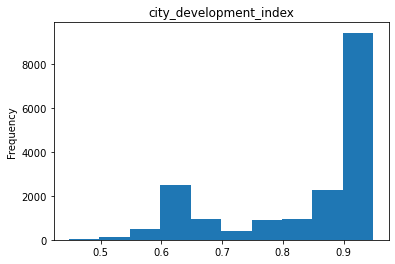

In [94]:
X_hr_fill['city_development_index'].plot.hist(title='city_development_index')

<AxesSubplot:title={'center':'training_hours'}, ylabel='Frequency'>

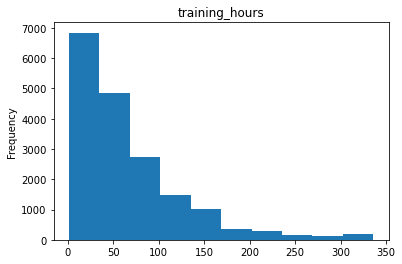

In [95]:
X_hr_fill['training_hours'].plot.hist(title='training_hours')

In [96]:
def plot_x_hr_fill(name):
    X_hr_fill[name].value_counts().plot(kind='bar', title=name)

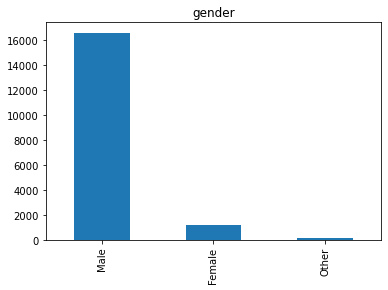

In [97]:
plot_x_hr_fill('gender')

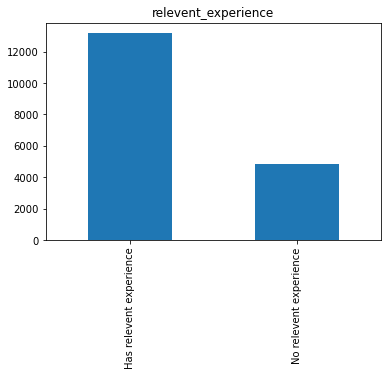

In [106]:
plot_x_hr_fill('relevent_experience')

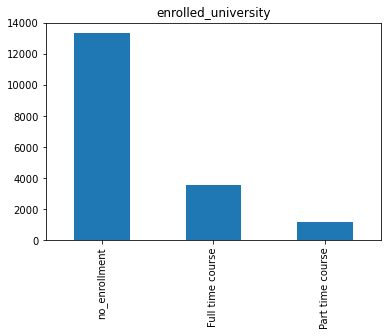

In [107]:
plot_x_hr_fill('enrolled_university')

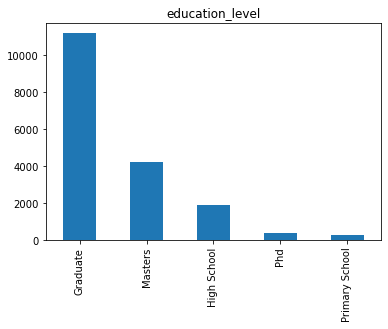

In [108]:
plot_x_hr_fill('education_level')

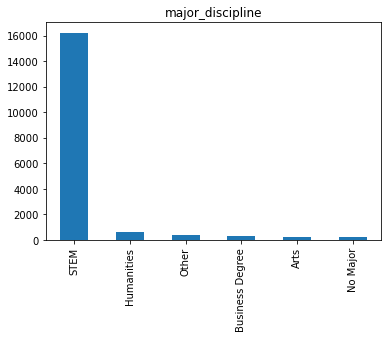

In [109]:
plot_x_hr_fill('major_discipline')

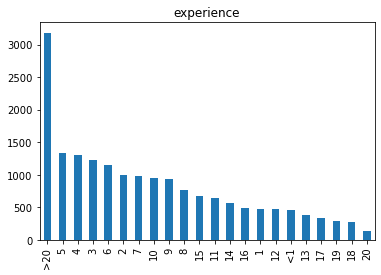

In [110]:
plot_x_hr_fill('experience')

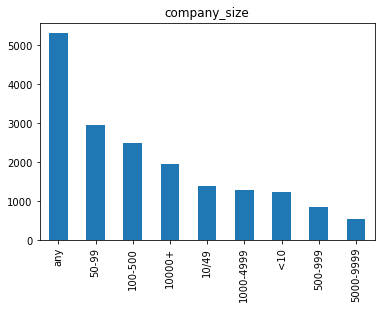

In [103]:
plot_x_hr_fill('company_size')

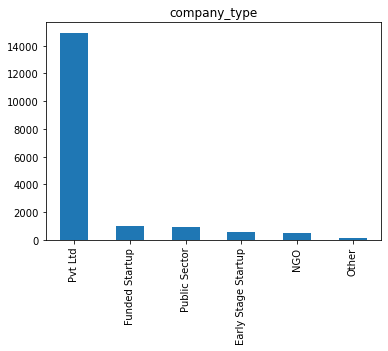

In [104]:
plot_x_hr_fill('company_type')

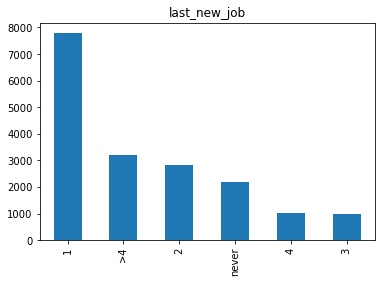

In [105]:
plot_x_hr_fill('last_new_job')

gender: процент Male немного вырос

company_size: в распределении категорий кроме any заметных изменений не видно

company_type: процент Pvt Ltd немного вырос

по остальным признакам изменения в распределении менее заметны

### Задание 3 (1 балл)

Выполните задание для датасета _covid_.

1. Найдите страну, для которой в датасете присутствует 46 дат со статистикой по вакцинации.
2. Постройте для этой страны график зависимости _total_vaccinations_ от _date_.
3. Заполните пропущенные данные о _total_vaccinations_ для этой страны. Объясните свой выбор.

In [113]:
print(X_covid.groupby(['country']).count().query('date == 46').index)

Index(['Bahrain'], dtype='object', name='country')


<AxesSubplot:xlabel='date'>

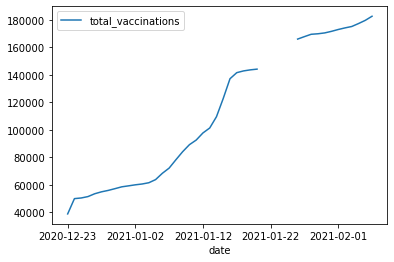

In [114]:
X_covid_bahrain = X_covid.query('country == "Bahrain"')
X_covid_bahrain.plot(x='date', y='total_vaccinations')

In [120]:
print(X_covid_bahrain.query('total_vaccinations.isna()', engine='python').date)

107    2021-01-21
108    2021-01-22
109    2021-01-23
110    2021-01-24
111    2021-01-25
Name: date, dtype: object


<AxesSubplot:xlabel='date'>

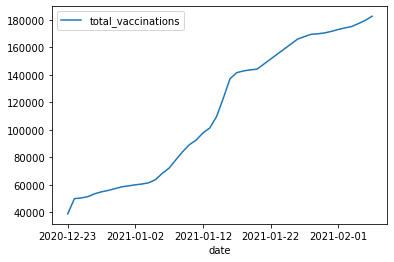

In [128]:
X_covid_bahrain_fill = X_covid_bahrain
X_covid_bahrain_fill.loc[:, 'total_vaccinations'].interpolate()
X_covid_bahrain_fill.plot(x='date', y='total_vaccinations')

_Ваш ответ_

график состоит из почти линейных участков, поэтому можно применить линейную интерполяцию

### Задание 4  (0.5 балла)
Выполните задание для датасета _hr_.

Есть ли в данных выбросы? Если да, то скажите, какие и почему Вы считаете их выбросами?


_Ваш ответ_

выбросов нет

на гистограммах видно, что значений по краям диапазона достаточно много

минимум и максимум city_development_index лежат в диапазоне [0, 1], что выглядит разумно


минимум и максимум training_hours лежат в диапазоне [1, 350], что тоже выглядит реально

### Задание 5  (1 балл)
Выполните задание для датасета _hr_.

Закодируйте категориальные признаки при помощи One-hot encoding/Label encoding/Frequency encoding. Объясните свой выбор. (Обратите внимание, что некоторые категориальные признаки предполагают ранжирование в своих значениях)


In [134]:
def encode(X):
    def encode_experience(t):
        if t == '<1':
            return 0
        else:
            if t == '>20':
                return 21
            else:
                return int(t)
        
    labels = {
        'enrolled_university': {
            'no_enrollment': 0,
            'Part time course': 1,
            'Full time course': 2
        },
        'education_level': {
            'Primary School': 0,
            'High School': 1,
            'Graduate': 2,
            'Masters': 3,
            'Phd': 4,
        },
        'company_size': {
            'any': 3,
            '50-99': 2,
            '<10': 0,
            '10000+': 8,
            '5000-9999': 7,
            '1000-4999': 6,
            '10/49': 1,
            '100-500': 4,
            '500-999': 5,
        },
        'last_new_job': {
            '1': 1,
            '>4': 5,
            'never': 0,
            '4': 4,
            '3': 3,
            '2': 2,
        },
    }
    
    # Возвращает данные без категориальных признаков
    return X.join(pd.get_dummies(X.gender, prefix='gender'))\
            .join(pd.get_dummies(X.relevent_experience, prefix='relevent_experience'))\
            .join(pd.get_dummies(X.major_discipline, prefix='major_discipline'))\
            .join(pd.get_dummies(X.company_type, prefix='company_type'))\
            .drop(['gender', 'relevent_experience', 'major_discipline', 'company_type'], axis=1)\
            .assign(enrolled_university=X.loc[:, 'enrolled_university'].apply(lambda t: labels['enrolled_university'][t]))\
            .assign(education_level=X.loc[:, 'education_level'].apply(lambda t: labels['education_level'][t]))\
            .assign(experience=X.loc[:, 'experience'].apply(encode_experience))\
            .assign(company_size=X.loc[:, 'company_size'].apply(lambda t: labels['company_size'][t]))\
            .assign(last_new_job=X.loc[:, 'last_new_job'].apply(lambda t: labels['last_new_job'][t]))\
            .assign(city=X.loc[:, 'city'].apply(lambda t: int(t.replace('city_', ''))))

In [136]:
X_hr_encode = encode(X_hr_fill)

_Ваш ответ_

### Задание 6 (3.5 балла)

Выполните задание для датасета _hr_.




#### 1. (1 балл)
Реализуйте функцию undersampling

#### 2. (1 балл)
Реализуйте функцию oversampling

In [1]:
import numpy as np
import random

def undersampling(X, y):
    under = y.value_counts().idxmin()
    
    y_min = y[y == under]
    y_max = y[y != under]
    X_min = X.filter(y_min.index,axis = 0)
    X_max = X.filter(y_max.index,axis = 0)

    rows = random.sample(X_max.index.to_list(),len(y_min.index))
    X_under = X_max.loc[rows]
    y_under = y_max.loc[rows]
    
    X_under = pd.concat([X_under, X_min])
    y_under = pd.concat([y_under, y_min])

    # Возвращает данные, сбалансированные методом undersampling
    return X_under, y_under

def oversampling(X, y):
    over = y.value_counts().idxmax()
    
    y_min = y[y != over]
    y_max = y[y == over]
    X_min = X.filter(y_min.index,axis = 0)
    X_max = X.filter(y_max.index,axis = 0)
    
    rows = random.choices(X_min.index.to_list(),k=len(y_max.index))
    X_over = X_min.loc[rows]
    y_over = y_min.loc[rows]
    
    X_over = pd.concat([X_over, X_max])
    y_over = pd.concat([y_over, y_max])
    
    # Возвращает данные, сбалансированные методом undersampling
    return X_over, y_over

In [177]:
X_hr_under, y_hr_under = undersampling(X_hr_encode, y_hr_fill)

X_hr_over, y_hr_over = oversampling(X_hr_encode, y_hr_fill)

#### 3. (1 балл)
Используйте _SMOTE_ для балансировки датасета.

Помимо методов _undersampling_ и _oversampling_ существует подход, генерирующий элементы класса-меньшинства, похожие на уже присутствующие в выборке данных. Такой метод называется _Synthetic Minority Oversampling Technique_ (SMOTE). 

Метод _SMOTE_ , реализованный в библиотеке `imblearn`, генерирует синтетические примеры при помощи __k-nearest neighbor__ алгоритма (подробнее об этом алгоритме будет рассказано на лекции).

In [179]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 206 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 24.9 MB 725 kB/s eta 0:00:01     |███████████████                 | 11.7 MB 2.3 MB/s eta 0:00:06
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [181]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_hr_SMOTE, y_hr_SMOTE = smote.fit_resample(X_hr_encode, y_hr_fill)

#### 4. (0.5 балла)
Как изменились распределения признаков при различных тактиках балансирования датасета?

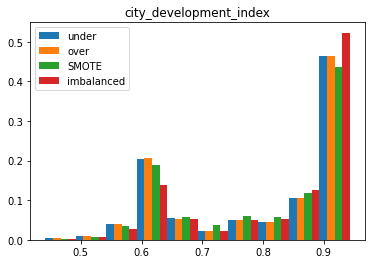

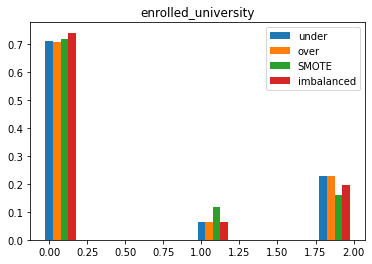

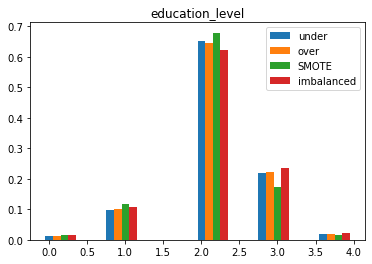

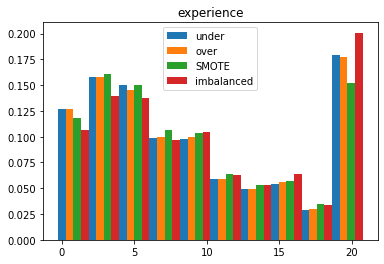

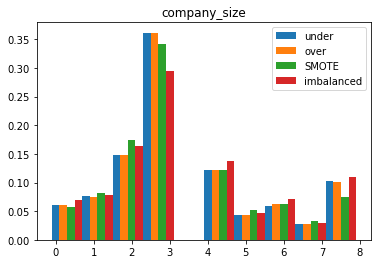

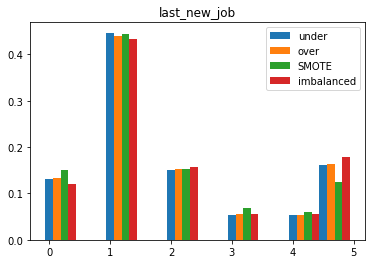

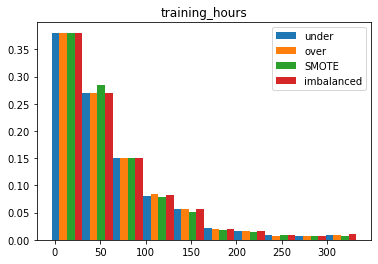

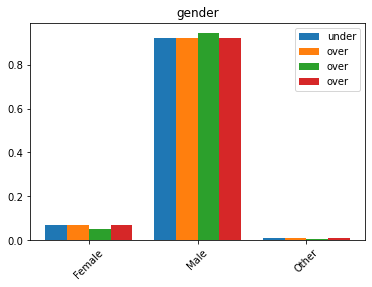

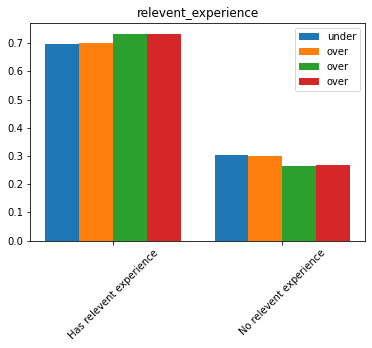

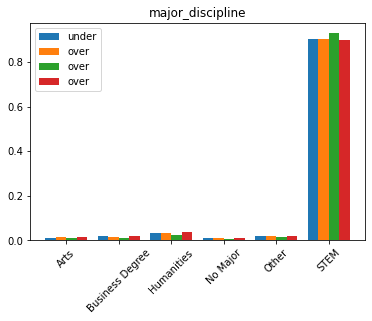

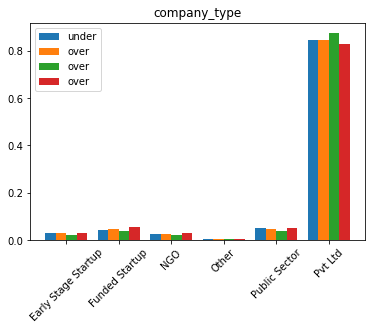

In [241]:
%matplotlib inline
import matplotlib.pyplot as plt

def compare_balance(name):
    fig, ax = plt.subplots()

    a_heights, a_bins = np.histogram(X_hr_under[name])
    b_heights, b_bins = np.histogram(X_hr_over[name], bins=a_bins)
    c_heights, c_bins = np.histogram(X_hr_SMOTE[name], bins=a_bins)
    d_heights, d_bins = np.histogram(X_hr_encode[name], bins=a_bins)

    width = (a_bins[1] - a_bins[0])/4

    ax.bar(a_bins[:-1], a_heights/a_heights.sum(), width=width, label='under')
    ax.bar(b_bins[:-1]+width, b_heights/b_heights.sum(), width=width, label='over')
    ax.bar(c_bins[:-1]+(2*width), c_heights/c_heights.sum(), width=width, label='SMOTE')
    ax.bar(d_bins[:-1]+(3*width), d_heights/d_heights.sum(), width=width, label='imbalanced')
    ax.set_title(name)
    ax.legend()

def compare_balance_one_hot(name):
    fig, ax = plt.subplots()
    a_s = X_hr_under.filter(regex=name).sum(axis=0)
    bins = np.arange(len(a_s))
    a_heights = a_s.values
    b_heights = X_hr_over.filter(regex=name).sum(axis=0).values
    c_heights = X_hr_SMOTE.filter(regex=name).sum(axis=0).values
    d_heights = X_hr_encode.filter(regex=name).sum(axis=0).values
    ax.bar(bins-0.3, a_heights/a_heights.sum(), width=0.2, label='under')
    ax.bar(bins-0.1, b_heights/b_heights.sum(), width=0.2, label='over')
    ax.bar(bins+0.1, c_heights/c_heights.sum(), width=0.2, label='over')
    ax.bar(bins+0.3, d_heights/d_heights.sum(), width=0.2, label='over')
    ax.set_title(name)
    ax.set_xticks(bins)
    ax.set_xticklabels(map(lambda t: t.replace(name+'_', ''), a_s.index.to_list()))
    ax.xaxis.set_tick_params(rotation=45)
    ax.legend()
    
names = [
    'city_development_index',
    'enrolled_university',
    'education_level',
    'experience',
    'company_size',
    'last_new_job',
    'training_hours',
]
for name in names:
    compare_balance(name)
    
for name in ['gender', 'relevent_experience', 'major_discipline', 'company_type']:
    compare_balance_one_hot(name)

на гистограммах не видно заметных различий в распределении признаков в зависимости от тактики балансирования датасета